In [1]:
warning('off','all');
function [zv, A, uv] = iesolve0(K, u, a, b, x1, x2, N)
    xv = linspace(x1, x2, N);
    sv = linspace(a, b, N);
    hx = (x2-x1)/(N-1);
    hs = (b-a)/(N-1);
    [X, S] = ndgrid(xv, sv);

    A = arrayfun(K, X, S) * hs;
    A(:, 1) = A(:, 1)/ 2;
    A(:, end) = A(:, end)/ 2;
    uv = arrayfun(u, xv);
    zv = linsolve(A, uv');
end


In [2]:
function [zv, A, vv] = iesolve1(K, u, a, b, x1, x2, N, alpha)
    hx = (x2-x1)/(N-1);
    hs = (b-a)/(N-1);
    
    xv = linspace(x1, x2, N); % j
    sv = linspace(a, b, N); % l
    tv = linspace(a, b, N); % i
    
    vv = zeros(1, N);
    Kwave = zeros(N);
    
    % v_i
    for i = 1:N
        if isa(u, 'function_handle')
            res = arrayfun(@(x) K(x, tv(i)), xv) .* arrayfun(u,  xv);
        else
            res = arrayfun(@(x) K(x, tv(i)), xv) .* u;
        end
        res(1) = res(1) / 2;
        res(end) = res(end) / 2;
        vv(i) = sum(res) * hx;
    end
    
    % Kwave
    for i = 1:N
        for l = 1:N
            res = arrayfun(@(x) K(x, tv(i)), xv) ...
                  .* arrayfun(@(x) K(x, sv(l)), xv);
            res(1) = res(1) / 2;
            res(end) = res(end) / 2;
            Kwave(i,l) = sum(res) * hx;
        end
    end
    
    A = Kwave;
	A(:, 1) = A(:, 1)/ 2;
    A(:, end) = A(:, end)/ 2;
    A = A * hs;
    A = A + alpha * eye(N);
    
    zv = linsolve(A, vv');
end

function [zv, A, vv] = iesolve2(K, u, a, b, x1, x2, N, alpha)
    hx = (x2-x1)/(N-1);
    hs = (b-a)/(N-1);
    
    xv = linspace(x1, x2, N); % j
    sv = linspace(a, b, N); % l
    tv = linspace(a, b, N); % i
    
    vv = zeros(1, N);
    Kwave = zeros(N);
    
    % v_i
    for i = 1:N
        if isa(u, 'function_handle')
            res = arrayfun(@(x) K(x, tv(i)), xv) .* arrayfun(u,  xv);
        else
            res = arrayfun(@(x) K(x, tv(i)), xv) .* u;
        end
        res(1) = res(1) / 2;
        res(end) = res(end) / 2;
        vv(i) = sum(res) * hx;
    end
    
    % Kwave
    for i = 1:N
        for l = 1:N
            res = arrayfun(@(x) K(x, tv(i)), xv) ...
                  .* arrayfun(@(x) K(x, sv(l)), xv);
            res(1) = res(1) / 2;
            res(end) = res(end) / 2;
            Kwave(i,l) = sum(res) * hx;
        end
    end
    
    A = Kwave;
	A(:, 1) = A(:, 1)/ 2;
    A(:, end) = A(:, end)/ 2;
    A = A * hs;
    A = A + alpha * eye(N);
    
    B1 = diag([alpha/(hs^2) (2*alpha/(hs^2)).*ones(1,N-2) alpha/(hs^2)]);
    B2 = diag(-alpha/(hs^2).*ones(1,N-1), 1);
    B3 = diag(-alpha/(hs^2).*ones(1,N-1), -1);
    B = B1 + B2 + B3;
    
    A = A + B;
    
    zv = linsolve(A, vv');
end







In [3]:
N = 51;#КОЛИЧЕСТВО ТОЧЕК
K = @(x, s) 1 / (1 + 100*(x - s).^2);
u = @(x) 1/100 * (10*(1-x)*(atan(10*(1-x)) + atan(10*x)) - ...
    (1/2)*log((1+100*(1-x).^2) / (1+100*x.^2)));
a = 0; b = 1;
x1 = -1; x2 = 1;
c = 0.02;

Решение уравнения методом трапеции,без регуляризации (как будет видно на практике ,увелечение кол-ва точек только ухудшает решение)


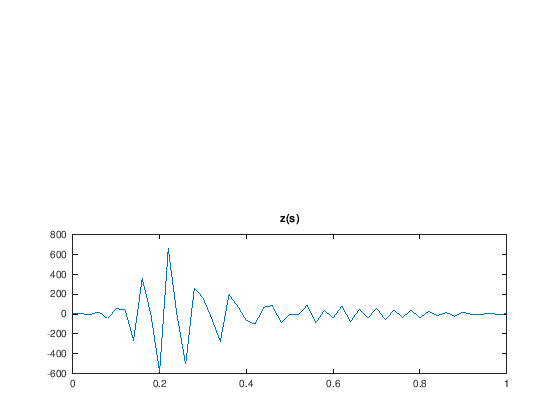

In [4]:
[zv0, ~, uv0] = iesolve0(K, u, a, b, x1, x2, N);
subplot(2,1,2);
plot(linspace(a,b,N), zv0);
title('z(s)');

Решение уравнения с регуляризацией(параметр alpha будем подбирать в ручную)




alpha1 =  0.00010000


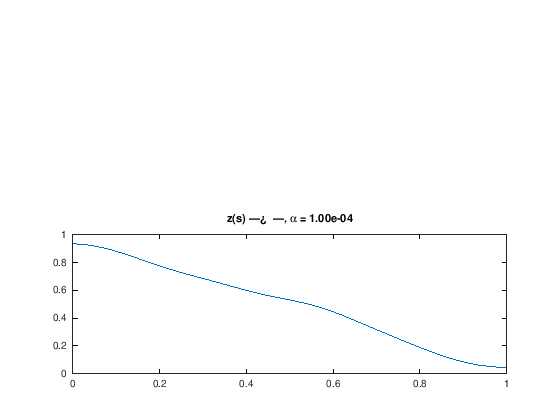

In [5]:
xv = linspace(x1, x2, N);
[~, A, uv] = iesolve0(K, u, a, b, x1, x2, N);
noisev = 2 * c .* (rand(1, N) - 0.5);
udeltav = uv + noisev;
delta = norm(udeltav - uv);
delta_relative = delta / norm(uv);

alpha1=1*10^(-4)#Здесь меняем параметр alpha
zv1 = iesolve2(K, udeltav, a, b, x1, x2, N, alpha1);

subplot(2,1,2);
plot(linspace(a,b,N), zv1, 'LineWidth', 1)
title(['z(s) при \alpha = ', sprintf('%.2e', alpha1)]);


$$При\quad alpha=1*10^-7 \quadначинают \quadпоявляться \quadколебания $$

alpha2 =  0.00000010000


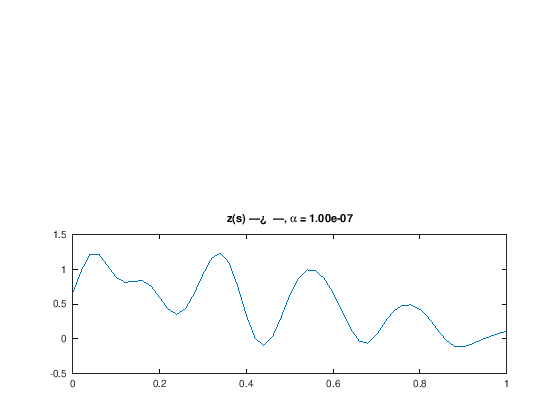

In [6]:
alpha2=1*10^(-7)#Здесь меняем параметр alpha
zv2 = iesolve2(K, udeltav, a, b, x1, x2, N, alpha2);

subplot(2,1,2);
plot(linspace(a,b,N), zv2, 'LineWidth', 1)
title(['z(s) при \alpha = ', sprintf('%.2e', alpha2)]);

alpha3 =  0.0010000


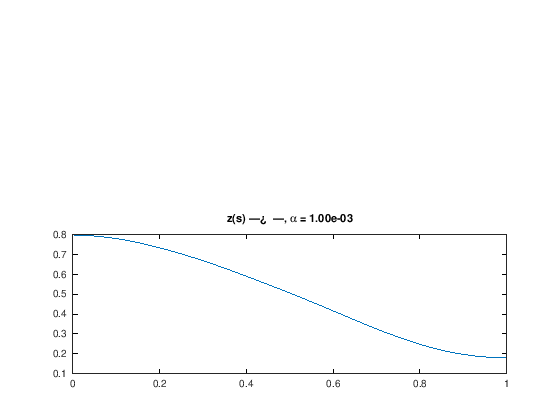

In [7]:
alpha3=1*10^(-3)#Здесь меняем параметр alpha
zv3 = iesolve2(K, udeltav, a, b, x1, x2, N, alpha3);

subplot(2,1,2);
plot(linspace(a,b,N), zv3, 'LineWidth', 1)
title(['z(s) при \alpha = ', sprintf('%.2e', alpha3)]);

График U(x)


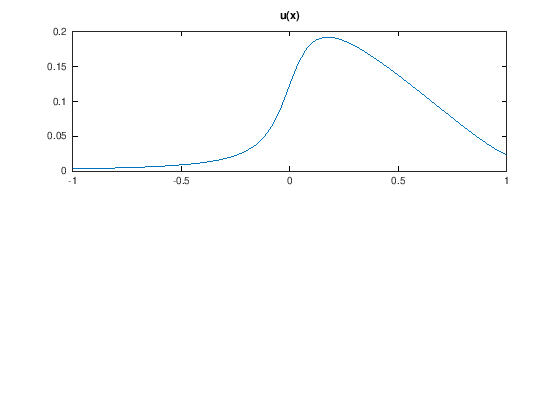

In [8]:
subplot(2,1,1);
plot(linspace(x1,x2,N), uv0);
title('u(x)');

Теперь построим график возмущенное U(x)(U(x)+какой-то случайный шум),дельта на графике -абсолютная погрешность,эпсилон-относительная.

error: legend: invalid location specified
error: called from
    legend at line 218 column 9


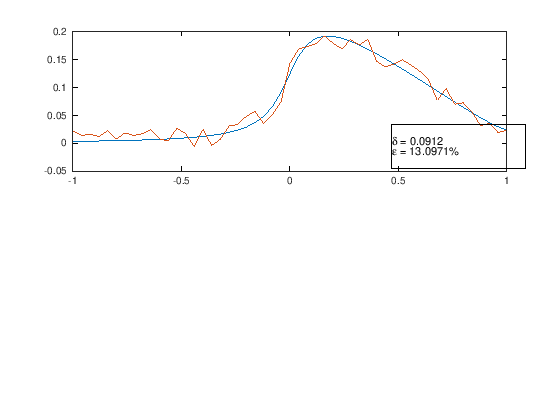

In [9]:
subplot(2,1,1);
plot(xv, uv, xv, udeltav, 'LineWidth', 1)
legend({'u(x)', 'u_\delta(x)'}, 'FontSize', 12)
an_str = {sprintf('\\delta = %.4f', delta), ...
          sprintf('\\epsilon = %.4f%%', delta_relative*100)};
annotation('textbox', [0.7 0.6 0.3 0.3], 'String', an_str, ...
           'FitBoxToText','on', 'FontSize', 11)

Теперь будем искать alpha не вручную ,а с помощью метода "деление отрезка пополам".Полученное значение alpha является наилучшим.

error: legend: invalid location specified
error: called from
    legend at line 218 column 9


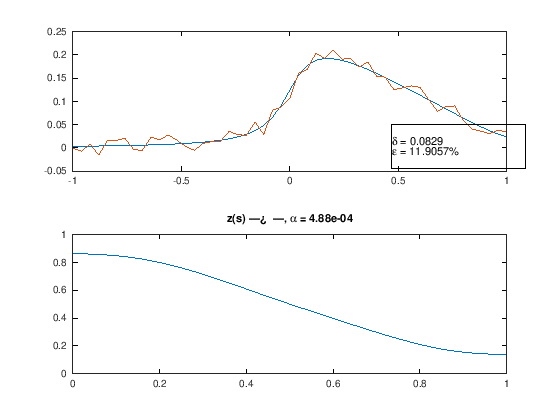

In [10]:
xv = linspace(x1, x2, N);
[~, A, uv] = iesolve0(K, u, a, b, x1, x2, N);
noisev = 2 * c .* (rand(1, N) - 0.5);
udeltav = uv + noisev;
delta = norm(udeltav - uv);
delta_relative = delta / norm(uv);

figure('Name', '¬озмущенна€ u(x)');
subplot(2,1,1);
plot(xv, uv, xv, udeltav, 'LineWidth', 1)
legend({'u(x)', 'u_\delta(x)'}, 'FontSize', 12)
an_str = {sprintf('\\delta = %.4f', delta), ...
          sprintf('\\epsilon = %.4f%%', delta_relative*100)};
annotation('textbox', [0.7 0.6 0.3 0.3], 'String', an_str, ...
           'FitBoxToText','on', 'FontSize', 11);
#Метод деления отрезка попалам       
alpha_r = 1;
alpha_l = 1e-12;
while 1
    alpha = (alpha_r - alpha_l)/2;
    zv = iesolve2(K, udeltav, a, b, x1, x2, N, alpha);
    d = norm(A*zv - udeltav');
    if d < 0.9*delta
        alpha_l = alpha;
    elseif d > 1.1*delta
        alpha_r = alpha;
    else
        break;
    end
end

subplot(2,1,2);
plot(linspace(a,b,N), zv, 'LineWidth', 1)
title(['z(s) при \alpha = ', sprintf('%.2e', alpha)]);



 Увеличиваем диапазон случайных значений и видим что ошибка растет.

error: legend: invalid location specified
error: called from
    legend at line 218 column 9


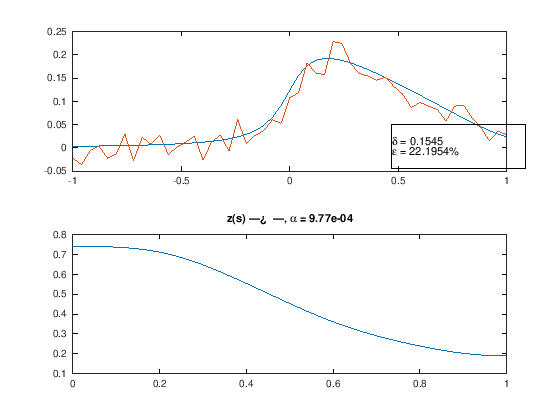

In [13]:
xv = linspace(x1, x2, N);
[~, A, uv] = iesolve0(K, u, a, b, x1, x2, N);
noisev = 4 * c .* (rand(1, N) - 0.5); ###Здесь меняем диапазон значения
udeltav = uv + noisev;
delta = norm(udeltav - uv);
delta_relative = delta / norm(uv);

figure('Name', '¬озмущенна€ u(x)');
subplot(2,1,1);
plot(xv, uv, xv, udeltav, 'LineWidth', 1)
legend({'u(x)', 'u_\delta(x)'}, 'FontSize', 12)
an_str = {sprintf('\\delta = %.4f', delta), ...
          sprintf('\\epsilon = %.4f%%', delta_relative*100)};
annotation('textbox', [0.7 0.6 0.3 0.3], 'String', an_str, ...
           'FitBoxToText','on', 'FontSize', 11);
       
alpha_r = 1;
alpha_l = 1e-12;
while 1
    alpha = (alpha_r - alpha_l)/2;
    zv = iesolve2(K, udeltav, a, b, x1, x2, N, alpha);
    d = norm(A*zv - udeltav');
    if d < 0.9*delta
        alpha_l = alpha;
    elseif d > 1.1*delta
        alpha_r = alpha;
    else
        break;
    end
end

subplot(2,1,2);
plot(linspace(a,b,N), zv, 'LineWidth', 1)
title(['z(s) при \alpha = ', sprintf('%.2e', alpha)]);



Пробуем сократить нашу ошибку уменьшая наш диапазон значений.

error: legend: invalid location specified
error: called from
    legend at line 218 column 9


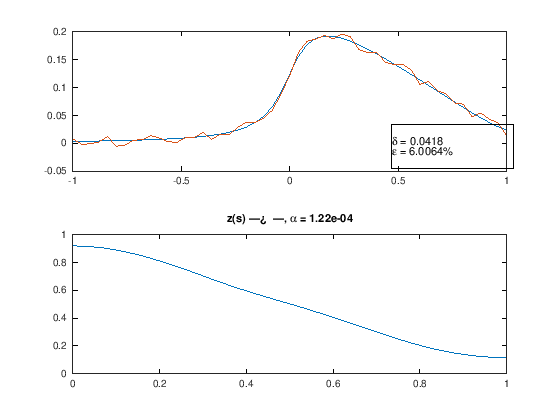

In [15]:
xv = linspace(x1, x2, N);
[~, A, uv] = iesolve0(K, u, a, b, x1, x2, N);
noisev = 1 * c .* (rand(1, N) - 0.5); ###Здесь меняем диапазон значений
udeltav = uv + noisev;
delta = norm(udeltav - uv);
delta_relative = delta / norm(uv);

figure('Name', '¬озмущенна€ u(x)');
subplot(2,1,1);
plot(xv, uv, xv, udeltav, 'LineWidth', 1)
legend({'u(x)', 'u_\delta(x)'}, 'FontSize', 12)
an_str = {sprintf('\\delta = %.4f', delta), ...
          sprintf('\\epsilon = %.4f%%', delta_relative*100)};
annotation('textbox', [0.7 0.6 0.3 0.3], 'String', an_str, ...
           'FitBoxToText','on', 'FontSize', 11);
       
alpha_r = 1;
alpha_l = 1e-12;
while 1
    alpha = (alpha_r - alpha_l)/2;
    zv = iesolve2(K, udeltav, a, b, x1, x2, N, alpha);
    d = norm(A*zv - udeltav');
    if d < 0.9*delta
        alpha_l = alpha;
    elseif d > 1.1*delta
        alpha_r = alpha;
    else
        break;
    end
end

subplot(2,1,2);
plot(linspace(a,b,N), zv, 'LineWidth', 1)
title(['z(s) при \alpha = ', sprintf('%.2e', alpha)]);


error: legend: invalid location specified
error: called from
    legend at line 218 column 9


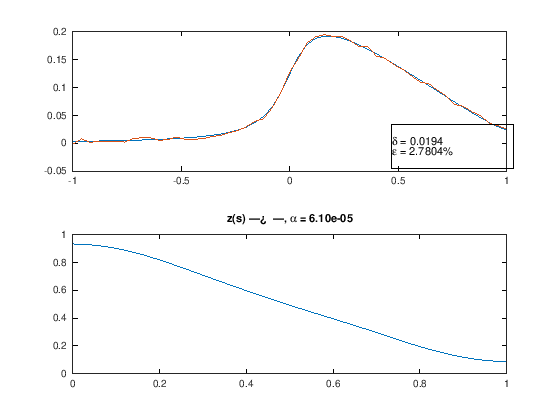

In [17]:
xv = linspace(x1, x2, N);
[~, A, uv] = iesolve0(K, u, a, b, x1, x2, N);
noisev = 0.5 * c .* (rand(1, N) - 0.5); ###Здесь меняем диапазон значения
udeltav = uv + noisev;
delta = norm(udeltav - uv);
delta_relative = delta / norm(uv);

figure('Name', '¬озмущенна€ u(x)');
subplot(2,1,1);
plot(xv, uv, xv, udeltav, 'LineWidth', 1)
legend({'u(x)', 'u_\delta(x)'}, 'FontSize', 12)
an_str = {sprintf('\\delta = %.4f', delta), ...
          sprintf('\\epsilon = %.4f%%', delta_relative*100)};
annotation('textbox', [0.7 0.6 0.3 0.3], 'String', an_str, ...
           'FitBoxToText','on', 'FontSize', 11);
       
alpha_r = 1;
alpha_l = 1e-12;
while 1
    alpha = (alpha_r - alpha_l)/2;
    zv = iesolve2(K, udeltav, a, b, x1, x2, N, alpha);
    d = norm(A*zv - udeltav');
    if d < 0.9*delta
        alpha_l = alpha;
    elseif d > 1.1*delta
        alpha_r = alpha;
    else
        break;
    end
end

subplot(2,1,2);
plot(linspace(a,b,N), zv, 'LineWidth', 1)
title(['z(s) при \alpha = ', sprintf('%.2e', alpha)]);


error: legend: invalid location specified
error: called from
    legend at line 218 column 9


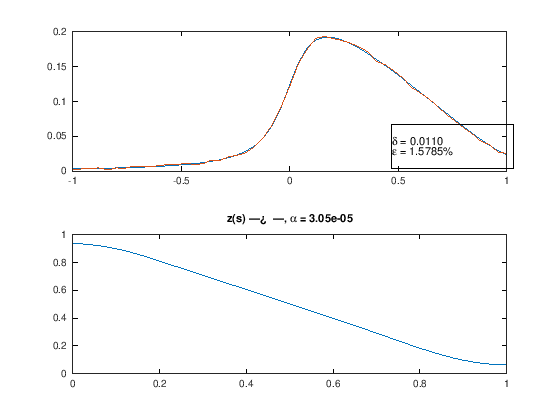

In [18]:
xv = linspace(x1, x2, N);
[~, A, uv] = iesolve0(K, u, a, b, x1, x2, N);
noisev = 0.3 * c .* (rand(1, N) - 0.5); ###Здесь меняем диапазон значения
udeltav = uv + noisev;
delta = norm(udeltav - uv);
delta_relative = delta / norm(uv);

figure('Name', '¬озмущенна€ u(x)');
subplot(2,1,1);
plot(xv, uv, xv, udeltav, 'LineWidth', 1)
legend({'u(x)', 'u_\delta(x)'}, 'FontSize', 12)
an_str = {sprintf('\\delta = %.4f', delta), ...
          sprintf('\\epsilon = %.4f%%', delta_relative*100)};
annotation('textbox', [0.7 0.6 0.3 0.3], 'String', an_str, ...
           'FitBoxToText','on', 'FontSize', 11);
       
alpha_r = 1;
alpha_l = 1e-12;
while 1
    alpha = (alpha_r - alpha_l)/2;
    zv = iesolve2(K, udeltav, a, b, x1, x2, N, alpha);
    d = norm(A*zv - udeltav');
    if d < 0.9*delta
        alpha_l = alpha;
    elseif d > 1.1*delta
        alpha_r = alpha;
    else
        break;
    end
end

subplot(2,1,2);
plot(linspace(a,b,N), zv, 'LineWidth', 1)
title(['z(s) при \alpha = ', sprintf('%.2e', alpha)]);
